In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(f'../DATA/aus_arrivals.csv')
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.head()

,Quarter,Origin,Arrivals
0,1981-01-01,Japan,14763
1,1981-04-01,Japan,9321
2,1981-07-01,Japan,10166
3,1981-10-01,Japan,19509
4,1982-01-01,Japan,17117


In [4]:
df.Origin.unique()

array(['Japan', 'NZ', 'UK', 'US'], dtype=object)

In [5]:
df.Quarter

0     1981-01-01
1     1981-04-01
2     1981-07-01
3     1981-10-01
4     1982-01-01
         ...    
503   2011-07-01
504   2011-10-01
505   2012-01-01
506   2012-04-01
507   2012-07-01
Name: Quarter, Length: 508, dtype: datetime64[ns]

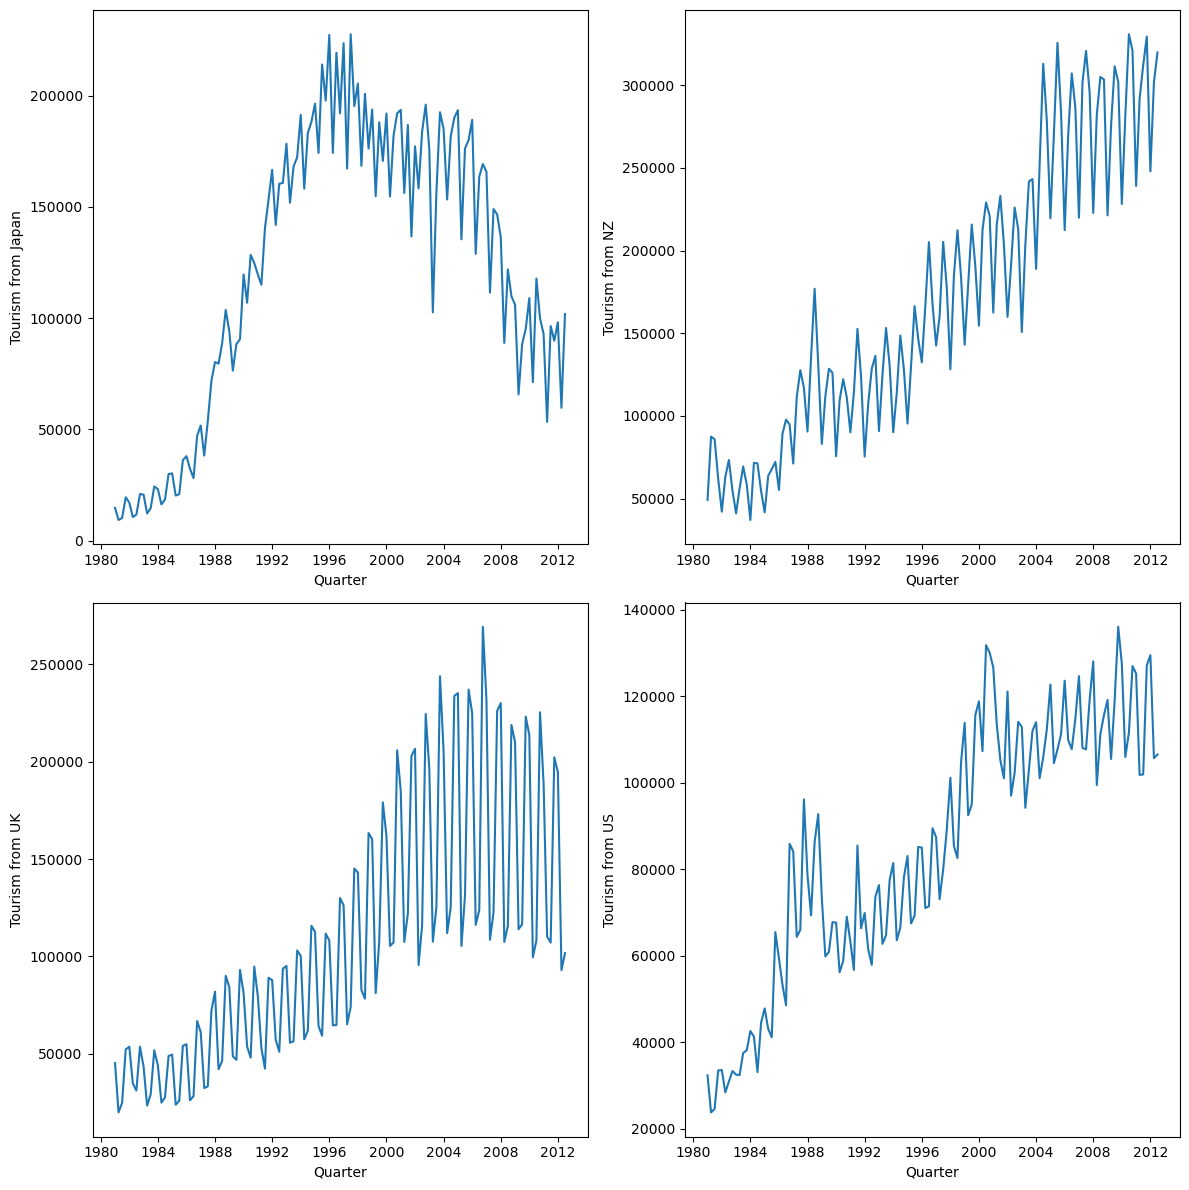

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
for origin, ax in zip(df.Origin.unique(), axes.flatten()):
    
    sns.lineplot(df[df['Origin'] == origin], x='Quarter', y='Arrivals', ax=ax)
    ax.set_ylabel(f'Tourism from {origin}')
plt.tight_layout()

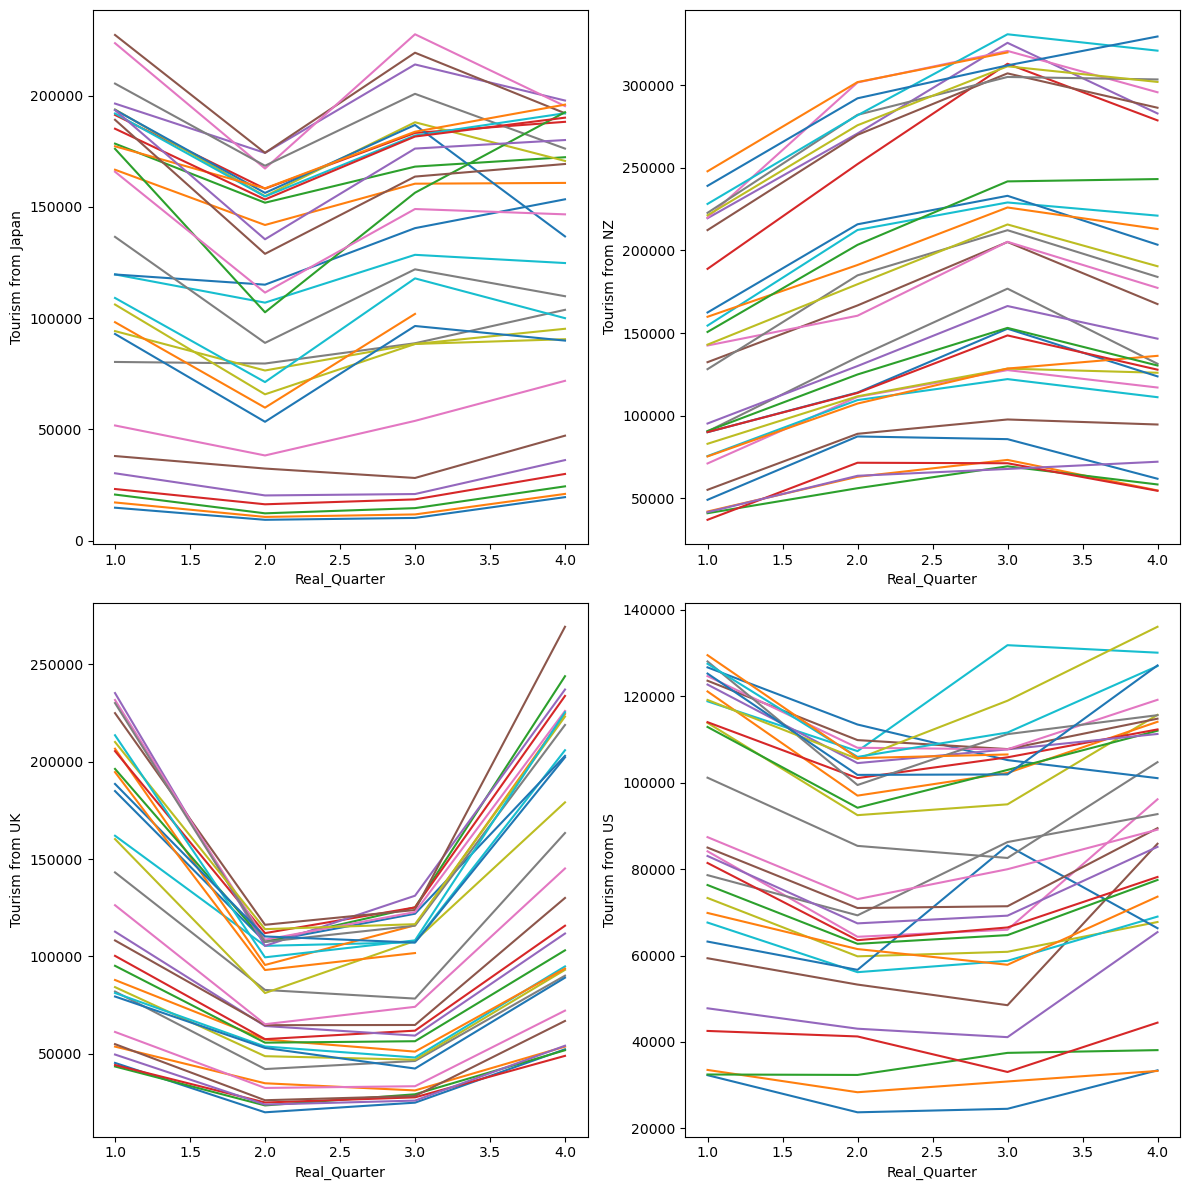

In [12]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
years = range(1981, 2013)

for origin, ax in zip(df.Origin.unique(), axes.flatten()):
    for year in years:
        include = df[df['Quarter'].dt.year == year]
        include.loc[:, 'Real_Quarter'] = include.loc[:, 'Quarter'].dt.quarter
        sns.lineplot(include[include['Origin'] == origin], x='Real_Quarter', y='Arrivals', ax=ax)
        ax.set_ylabel(f'Tourism from {origin}')
plt.tight_layout()

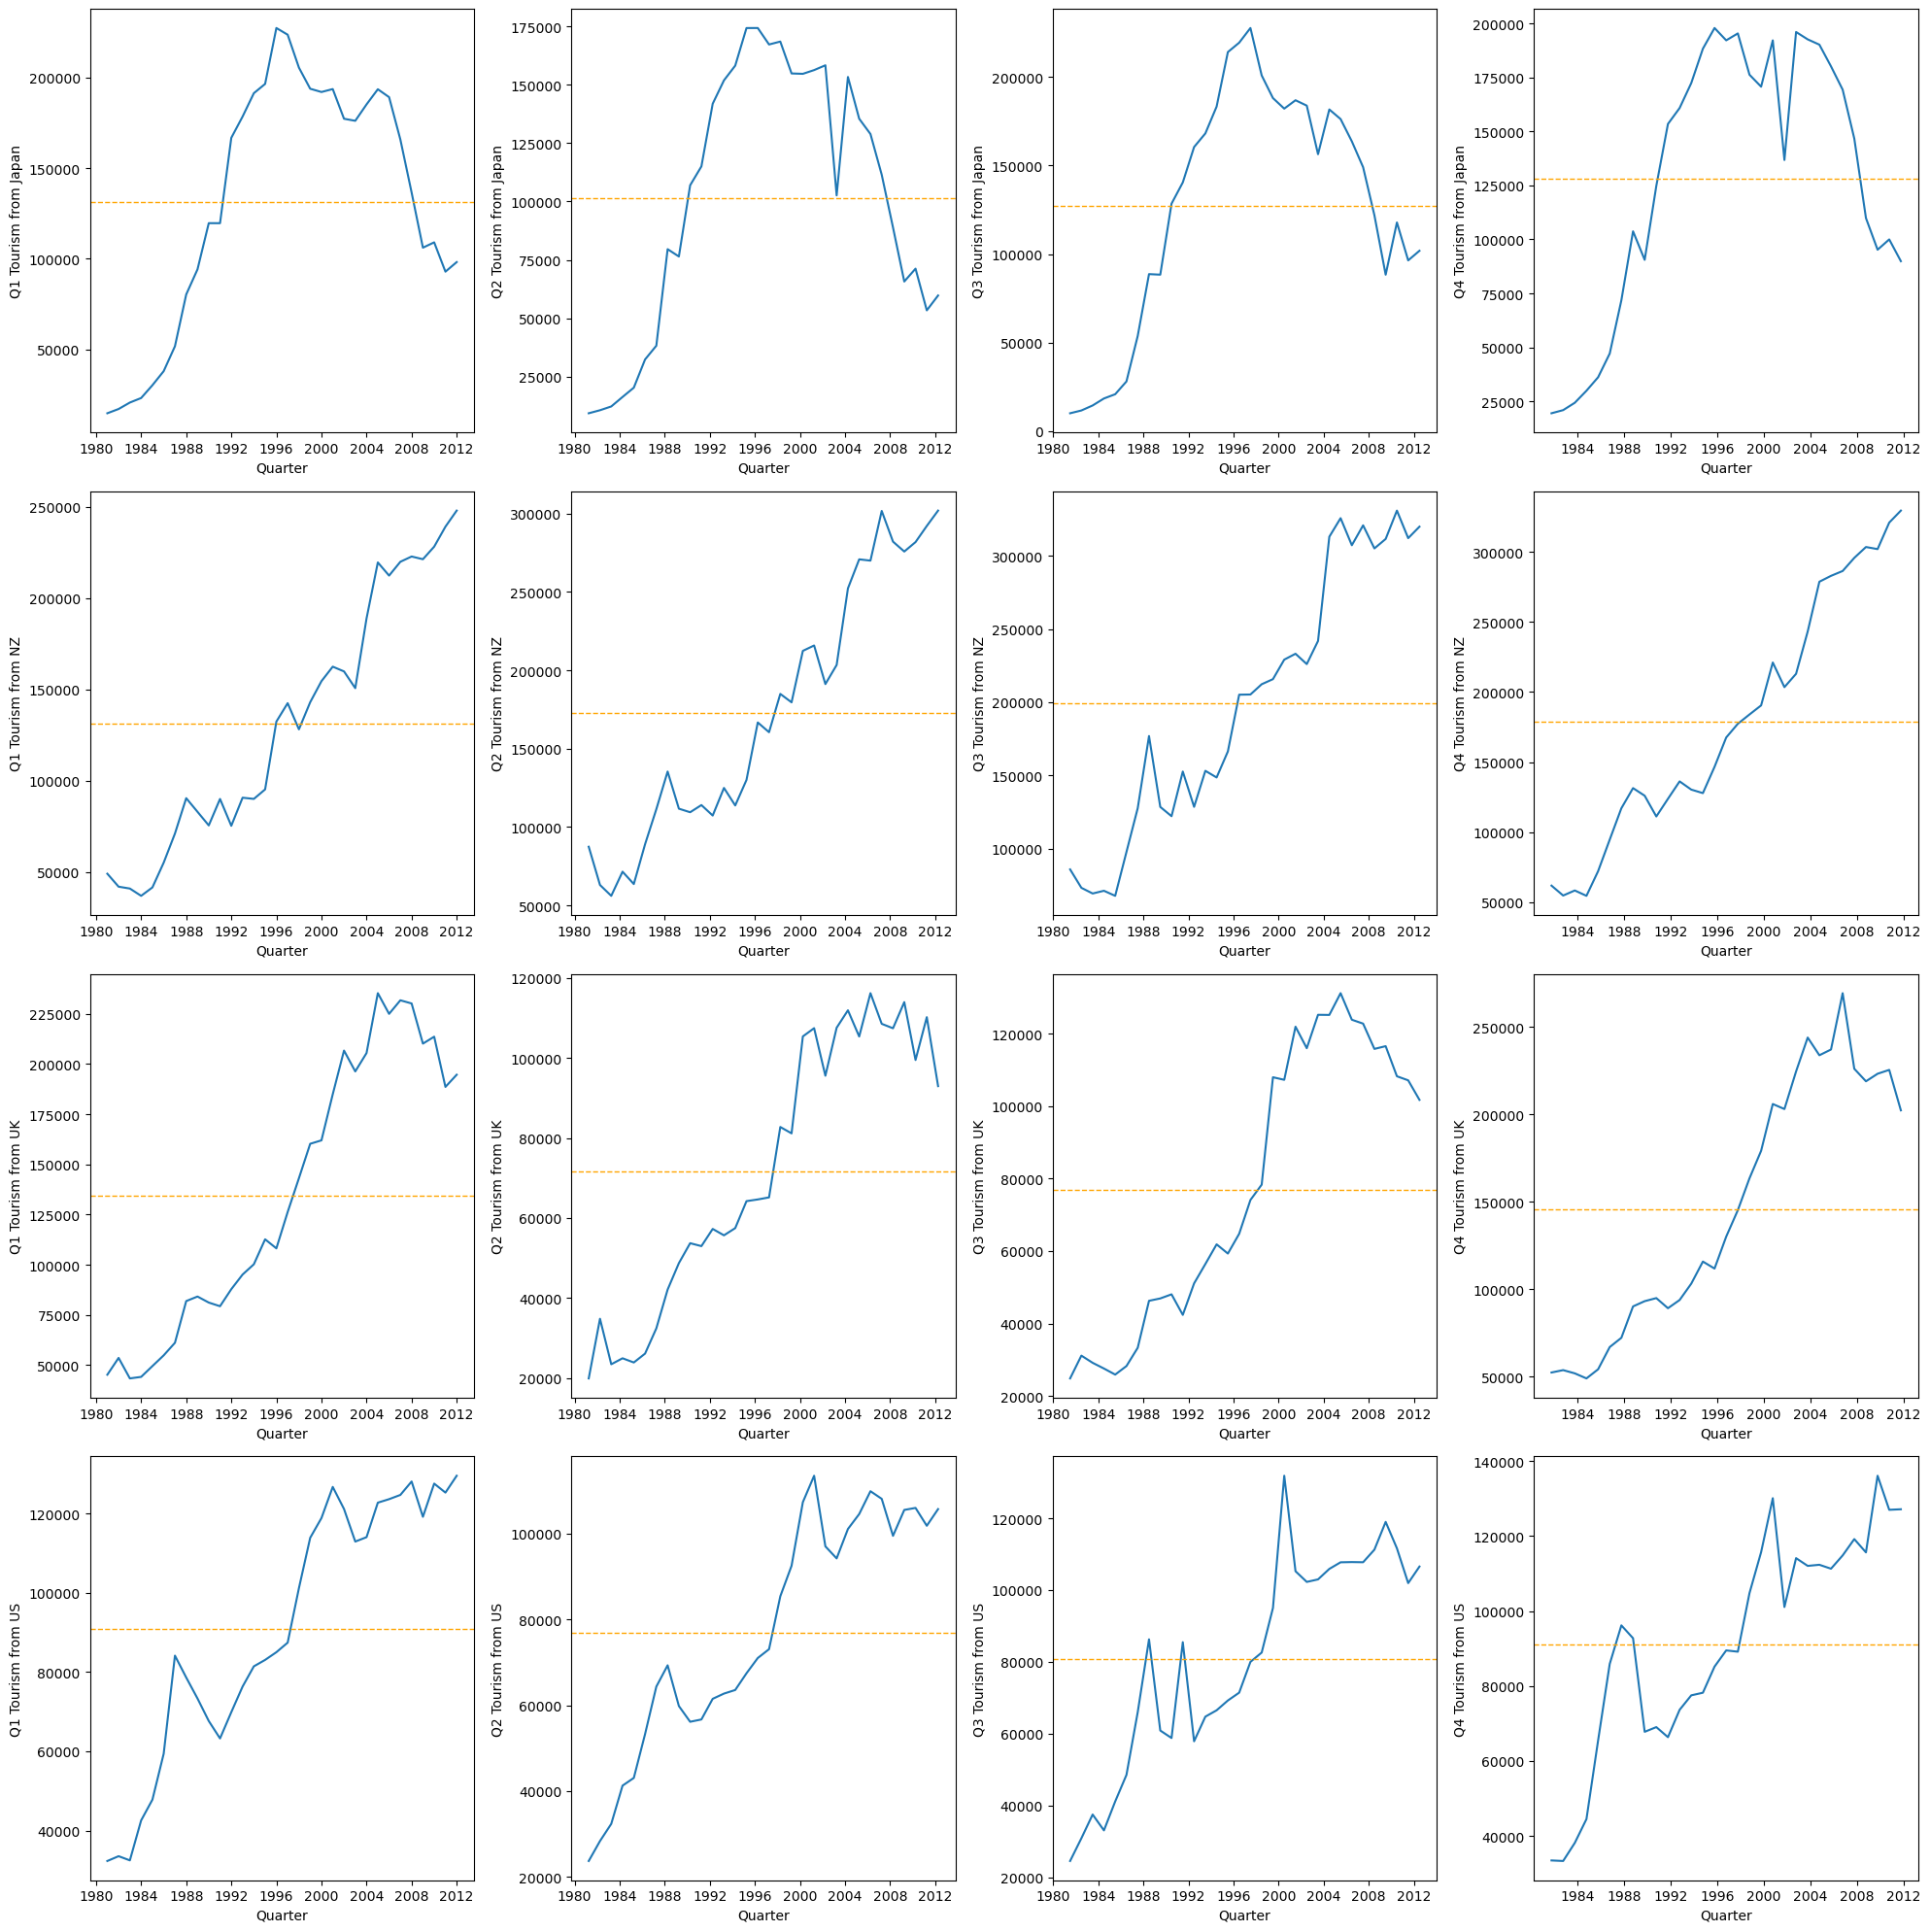

In [41]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
quarters = range(1,5)
df.loc[:, 'Real_Quarter'] = df.loc[:, 'Quarter'].dt.quarter


for origin, axes_origin in zip(df.Origin.unique(), axes):
    for quarter, ax in zip(quarters, axes_origin):
        include = df[(df['Real_Quarter'] == quarter) &
                     (df['Origin'] == origin)]
        
        mean_arival = include['Arrivals'].mean()

        sns.lineplot(include, x='Quarter', y='Arrivals', ax=ax)
        ax.set_ylabel(f'Q{quarter} Tourism from {origin}')
        
        ax.axhline(
            mean_arival, color="orange", linestyle="--", linewidth=1, label="Average"
        )
plt.tight_layout()